In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_auc_score,roc_curve
import pickle #sera utilisé pour générer le model après avoir entraîné

In [2]:
#Lire la base de données
df = pd.read_csv("Heart_disease_cleveland_new.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [3]:
#voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#voir les valeurs manquantes autrement
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#vérifier si certaines valeurs sont erronées
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


Mettre les caractéristiques de l’ensemble de données dans X et les étiquettes dans Y

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
X = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
Y = df['target']

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1


In [9]:
Y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64

In [10]:
#visualiser la variable target
Y.value_counts()

target
0    164
1    139
Name: count, dtype: int64

le pourcentage des individus ayant la maladie est de 0.5412541254125413 
le pourcentage des individus n'ayant pas la maladie est de 0.45874587458745875 


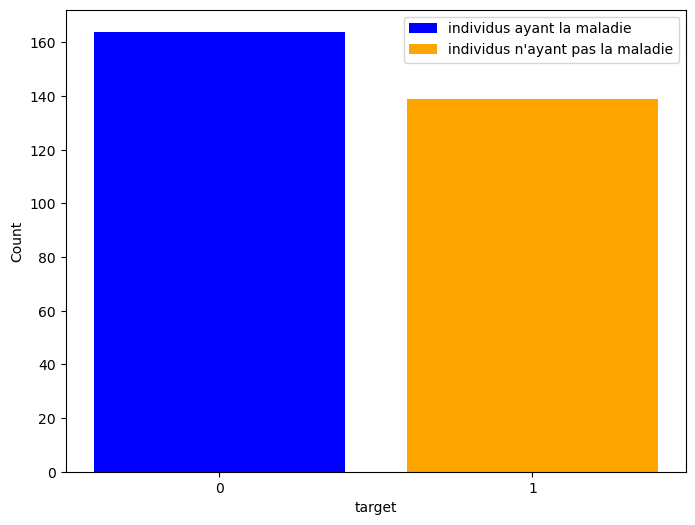

In [11]:
# Créer le graphique
plt.figure(figsize=(8,6))

# Calculer le nombre de chaque catégorie
counts = Y.value_counts()

# Créer des barres individuelles pour chaque catégorie
plt.bar(0, counts[0], color='blue', label='individus n\'ayant pas la maladie')
plt.bar(1, counts[1], color='orange', label="individus ayant la maladie")

# Ajouter des étiquettes
plt.xticks([0, 1])
plt.xlabel('target')
plt.ylabel('Count')
plt.legend()

# Calculer les pourcentages
yes = counts[1]/len(Y)
no  = counts[0]/len(Y)

# Afficher les pourcentages
print(f"le pourcentage des individus ayant la maladie est de {yes} ")
print(f"le pourcentage des individus n'ayant pas la maladie est de {no} ")

# Afficher le graphique
plt.show()


# impact de chaque variable sur le fait d'avoir la maladie ou pas

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


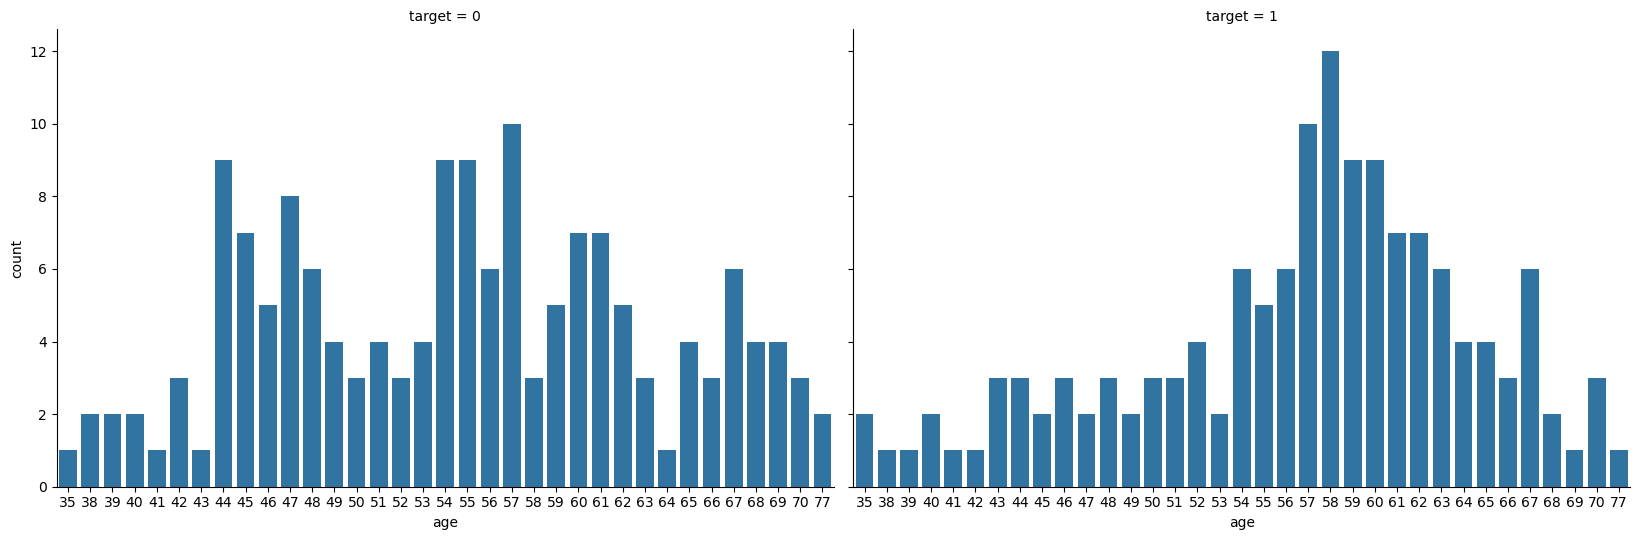

In [12]:
#age
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'age')

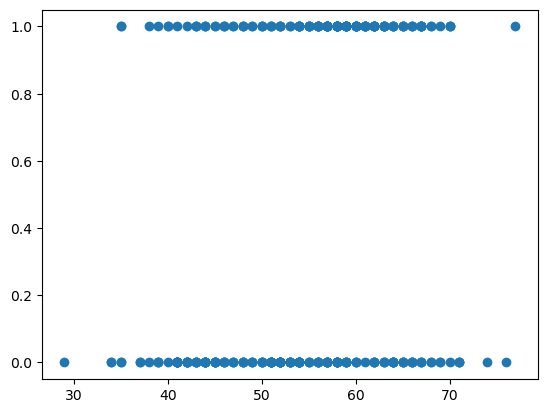

In [13]:
#age
plt.scatter(df['age'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


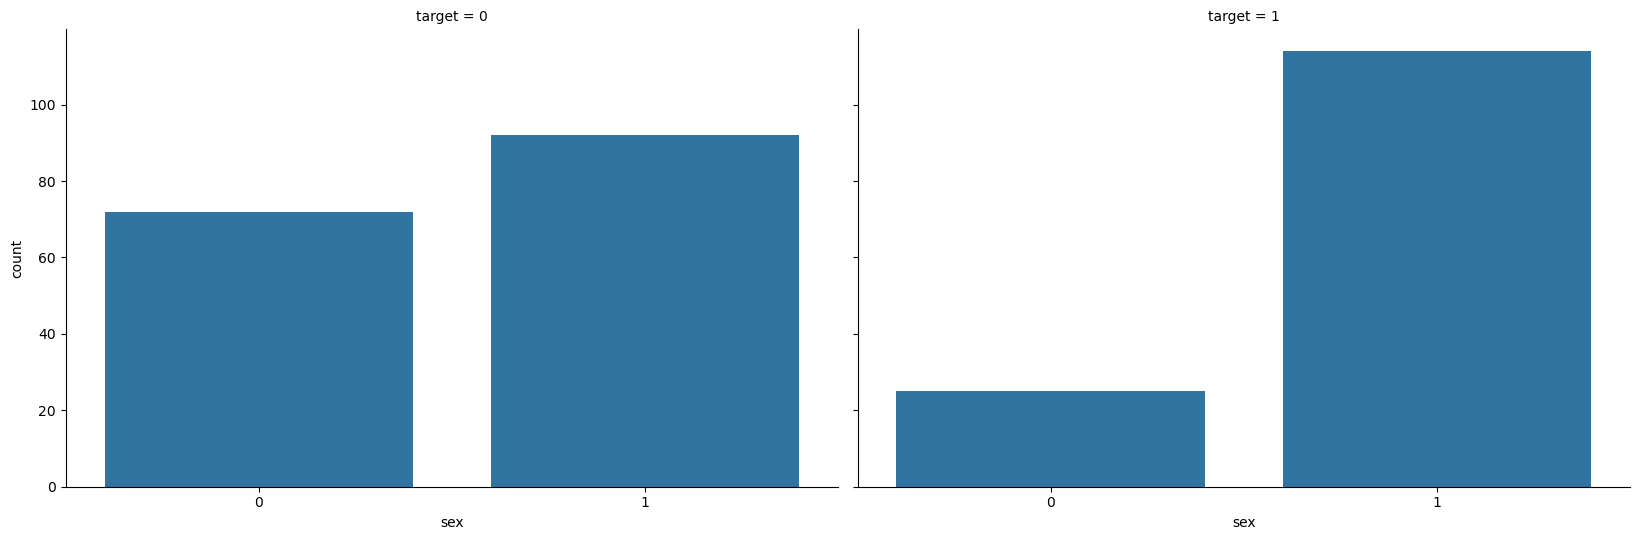

In [14]:
#sex
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'sex')

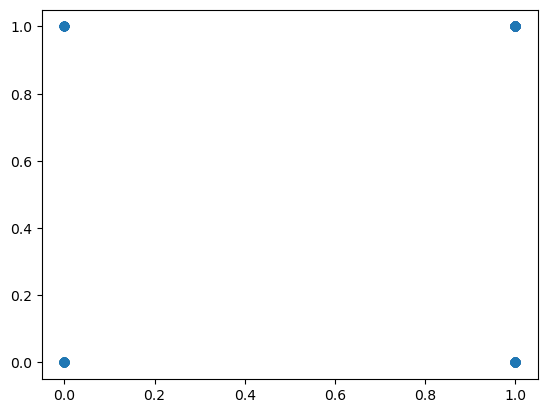

In [15]:
#sex
plt.scatter(df['sex'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


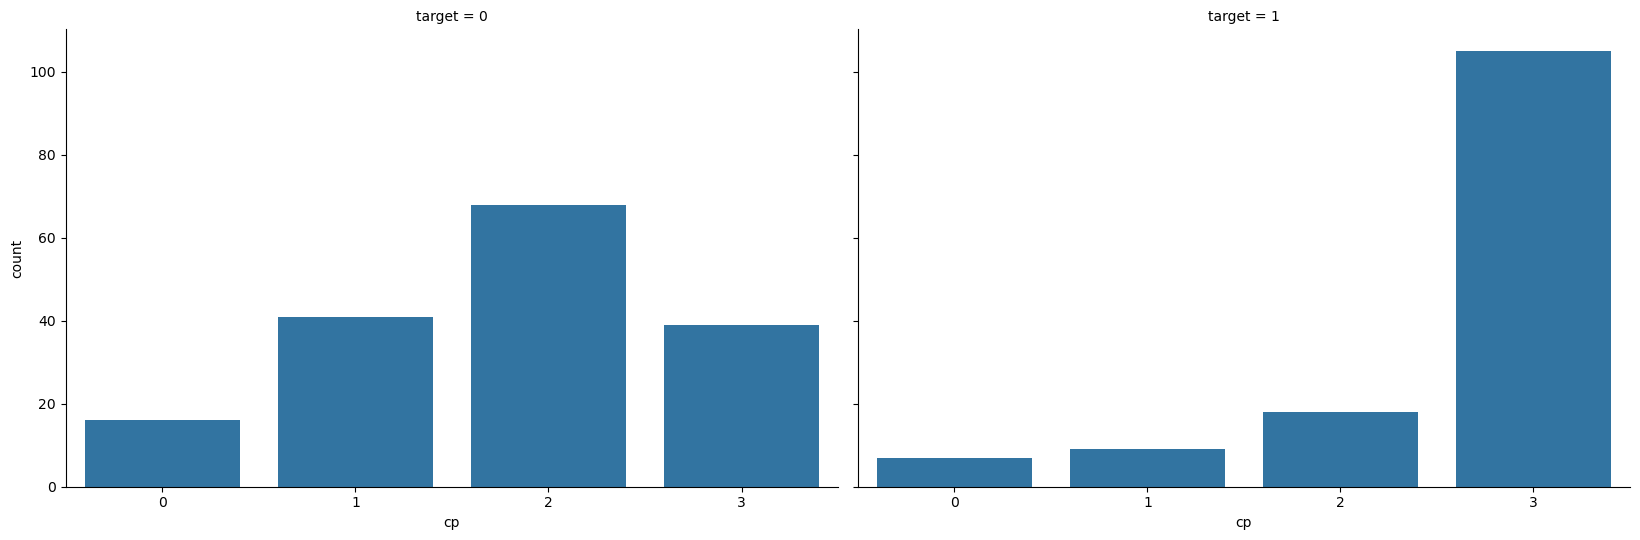

In [16]:
#cp
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'cp')

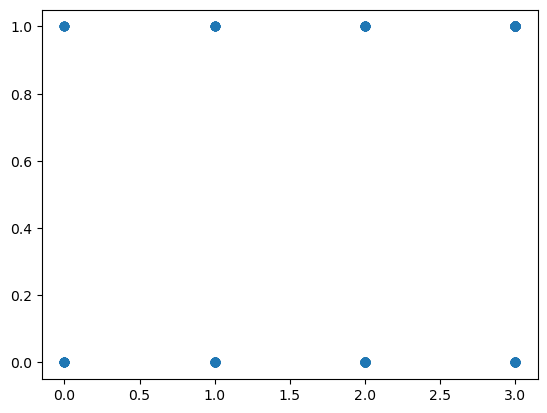

In [17]:
#cp
plt.scatter(df['cp'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


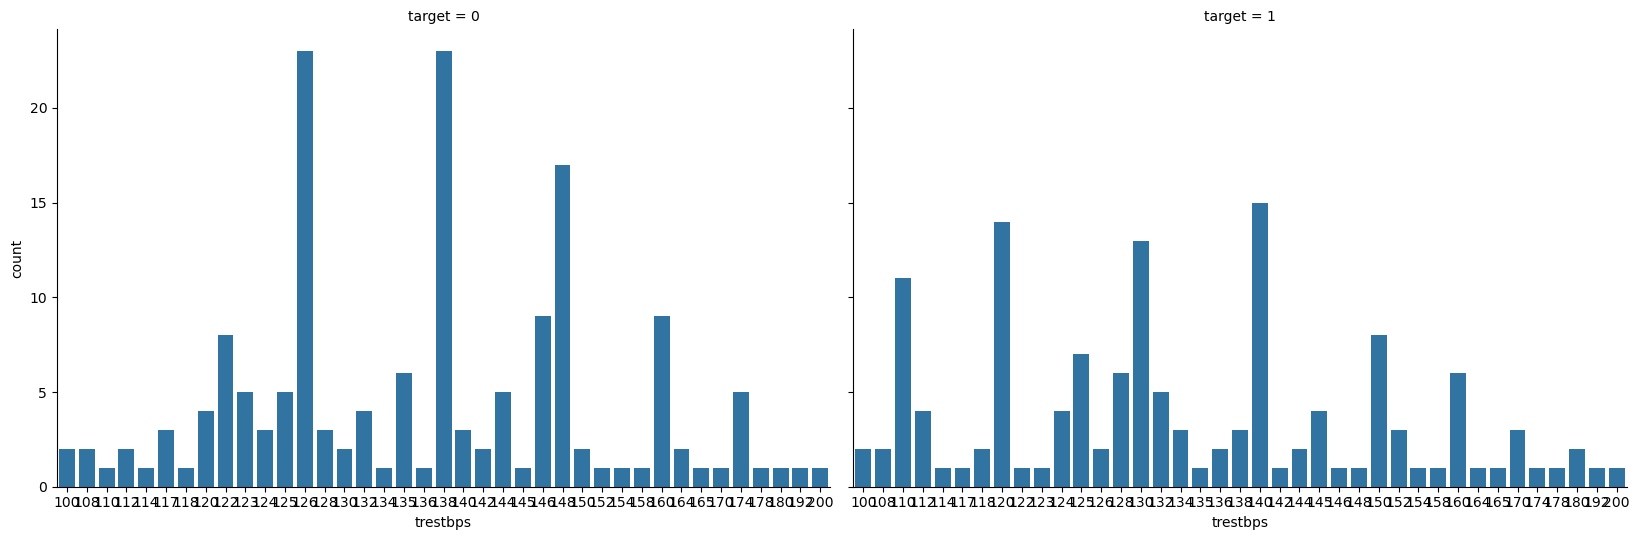

In [18]:
#trestbps
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'trestbps')

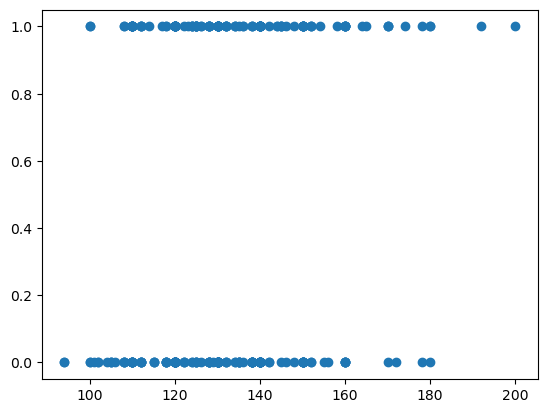

In [19]:
#trestbps
plt.scatter(df['trestbps'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


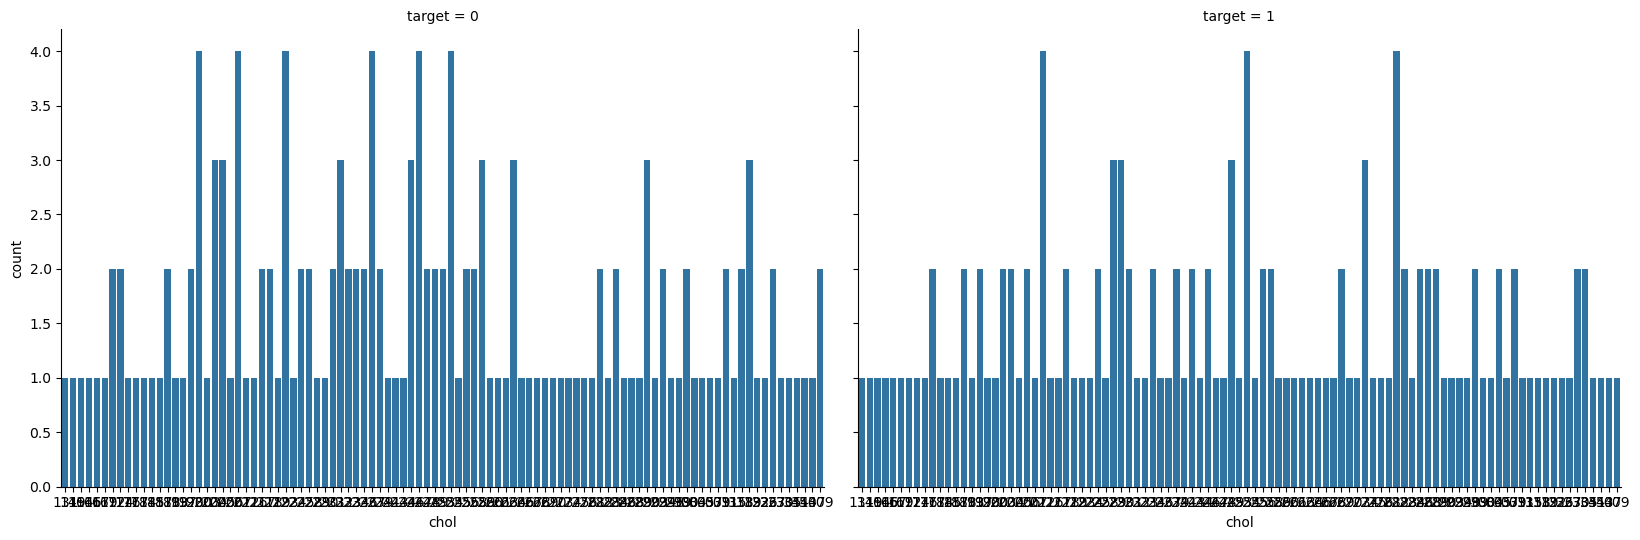

In [20]:
#chol
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'chol')

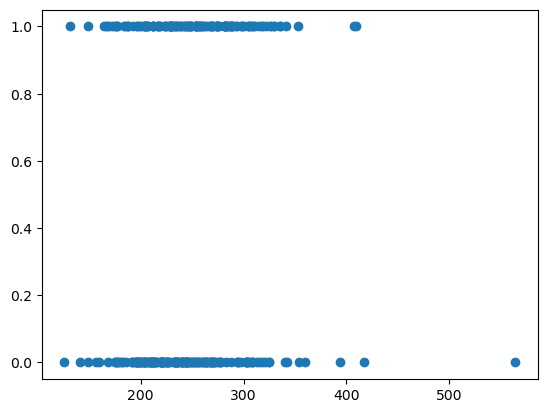

In [21]:
#chol
plt.scatter(df['chol'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


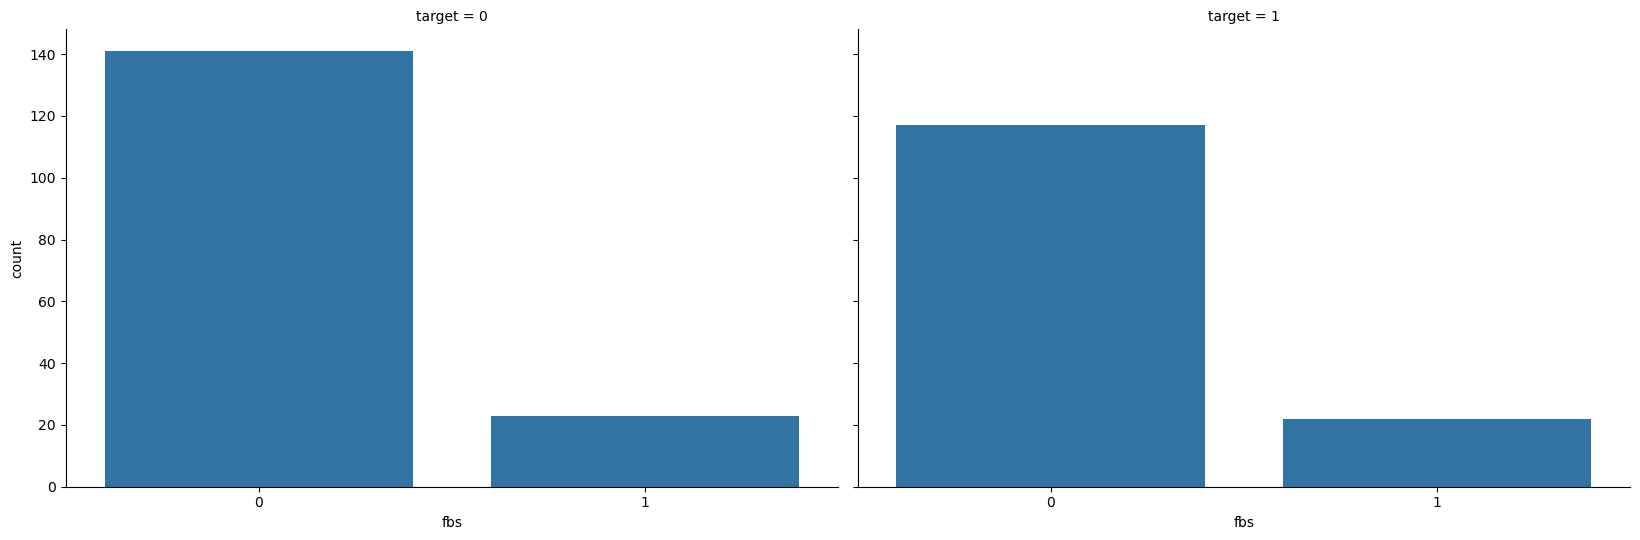

In [22]:
#fbs
#'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'fbs')

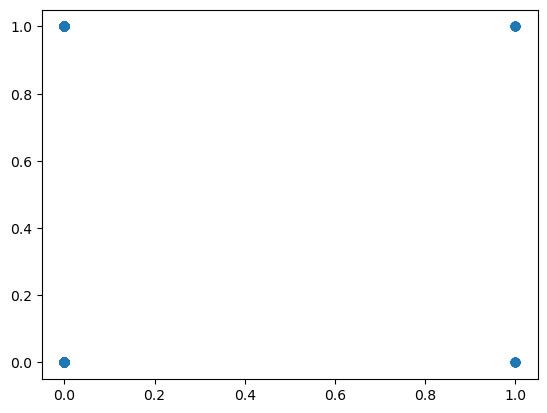

In [23]:
#fbs
plt.scatter(df['fbs'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


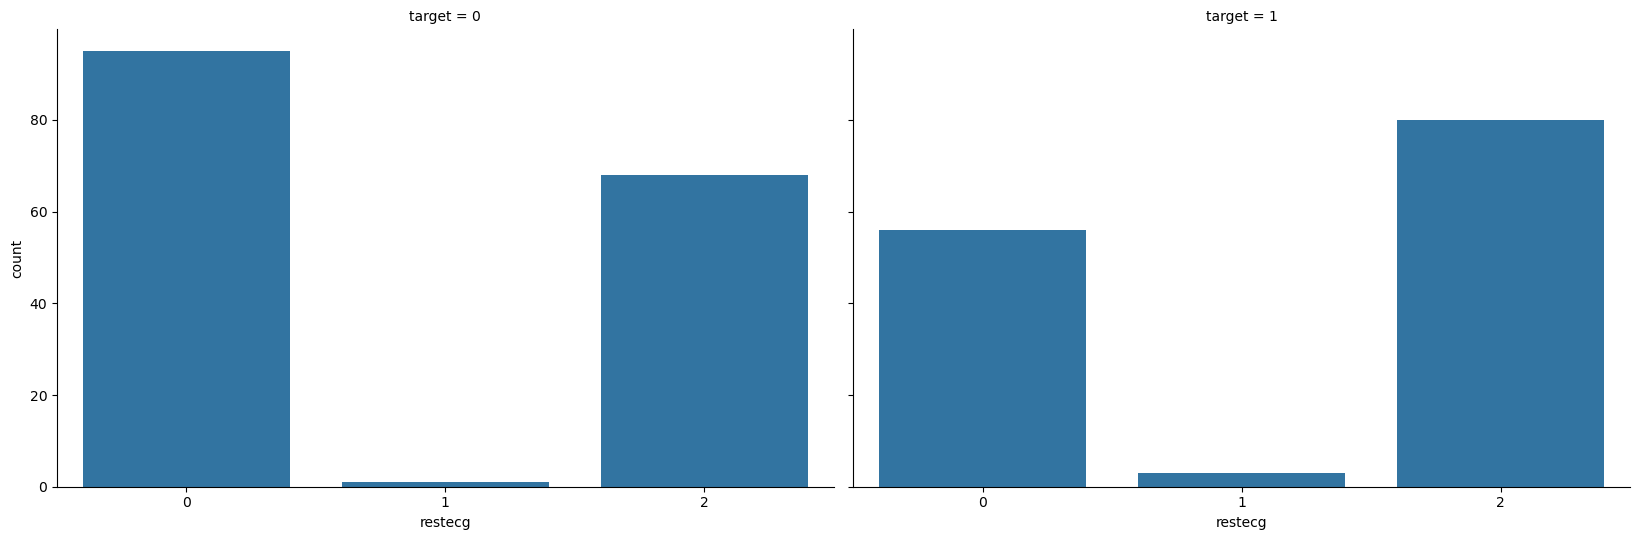

In [24]:
#restecg
#'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'restecg')

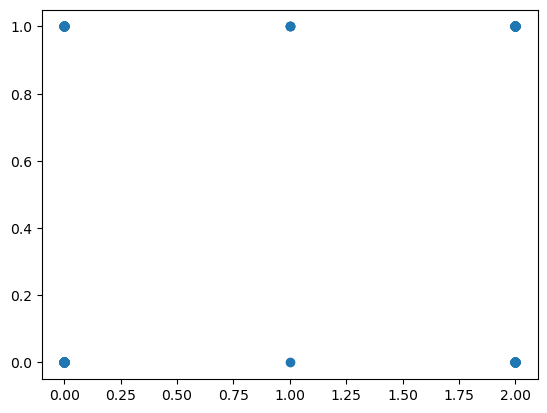

In [25]:
#restecg
plt.scatter(df['restecg'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


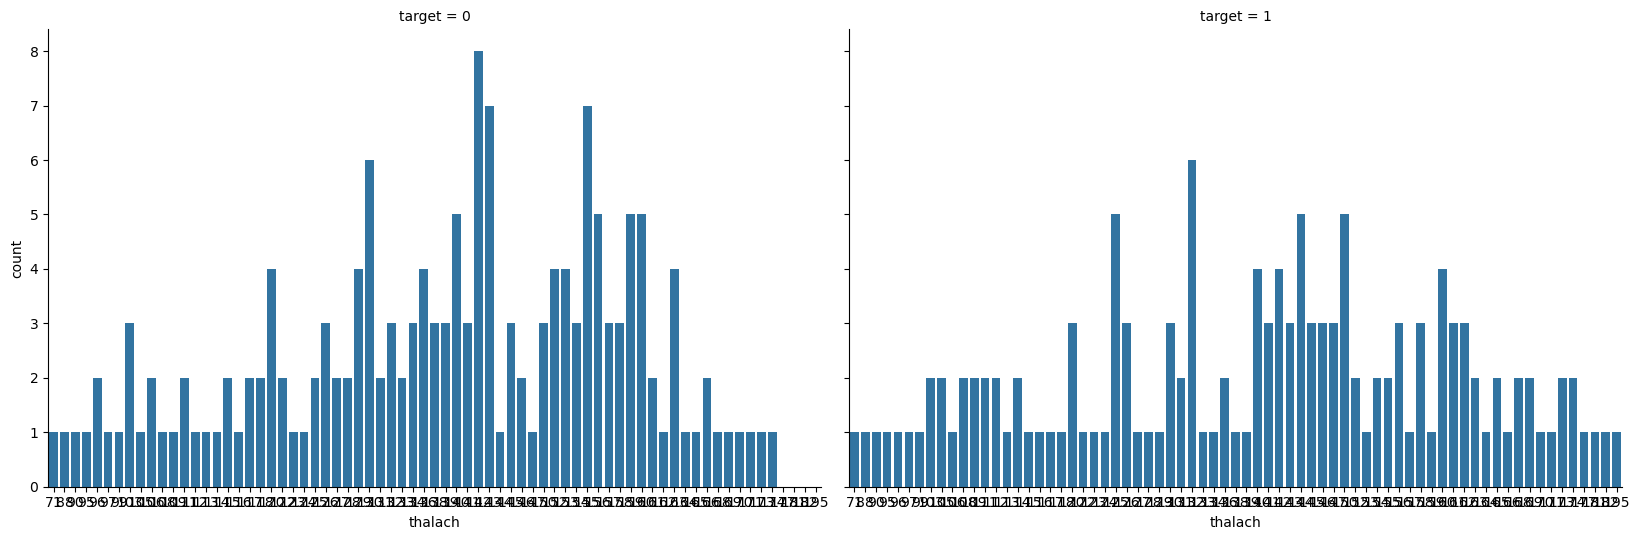

In [26]:
#thalach
#'exang', 'oldpeak', 'slope', 'ca', 'thal'
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'thalach')

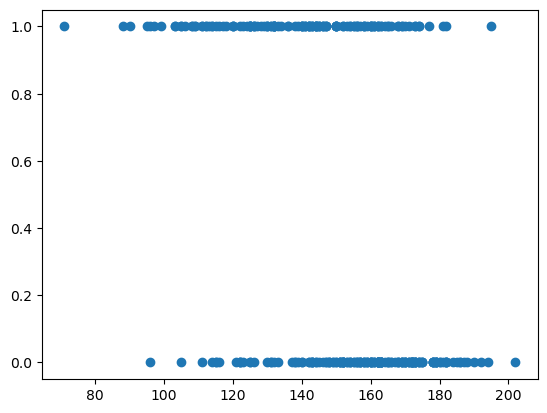

In [27]:
#thalach
plt.scatter(df['thalach'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


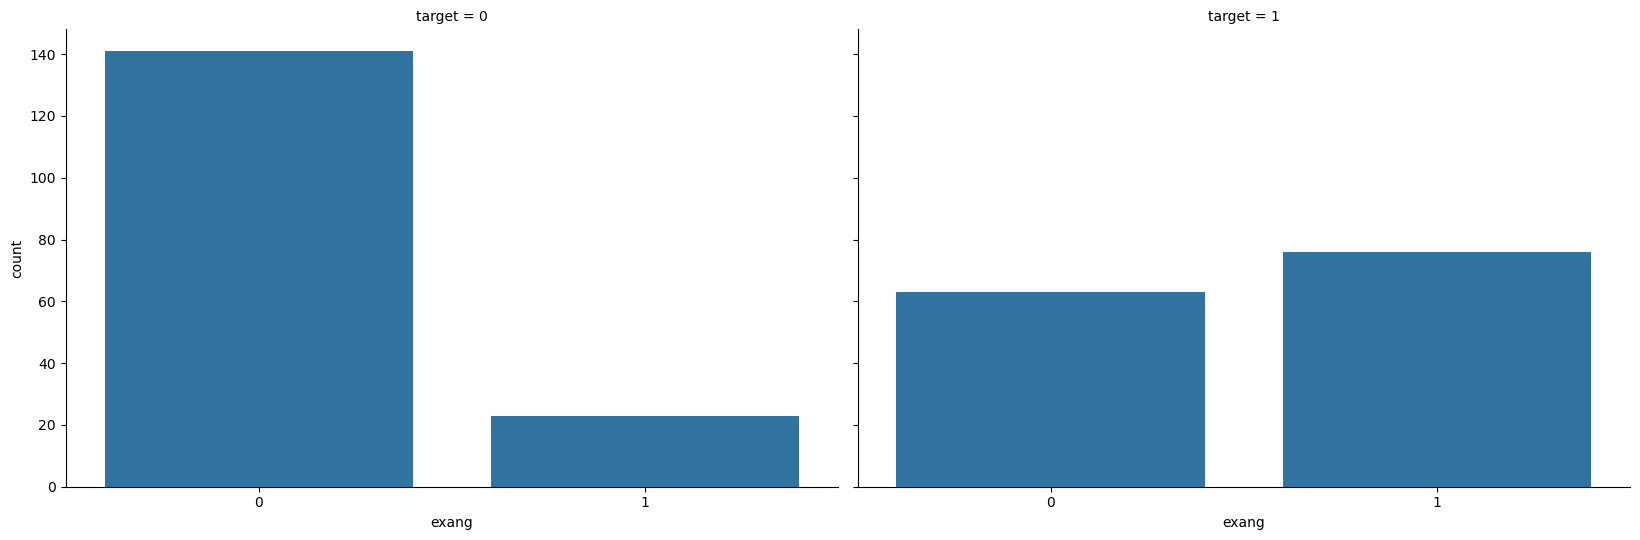

In [28]:
#exang
#'oldpeak', 'slope', 'ca', 'thal'
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'exang')

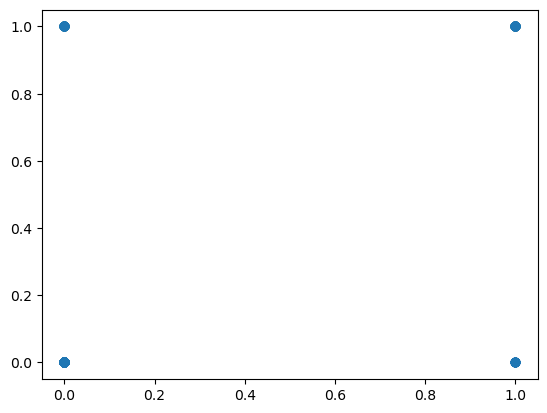

In [29]:
#exang
plt.scatter(df['exang'],df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


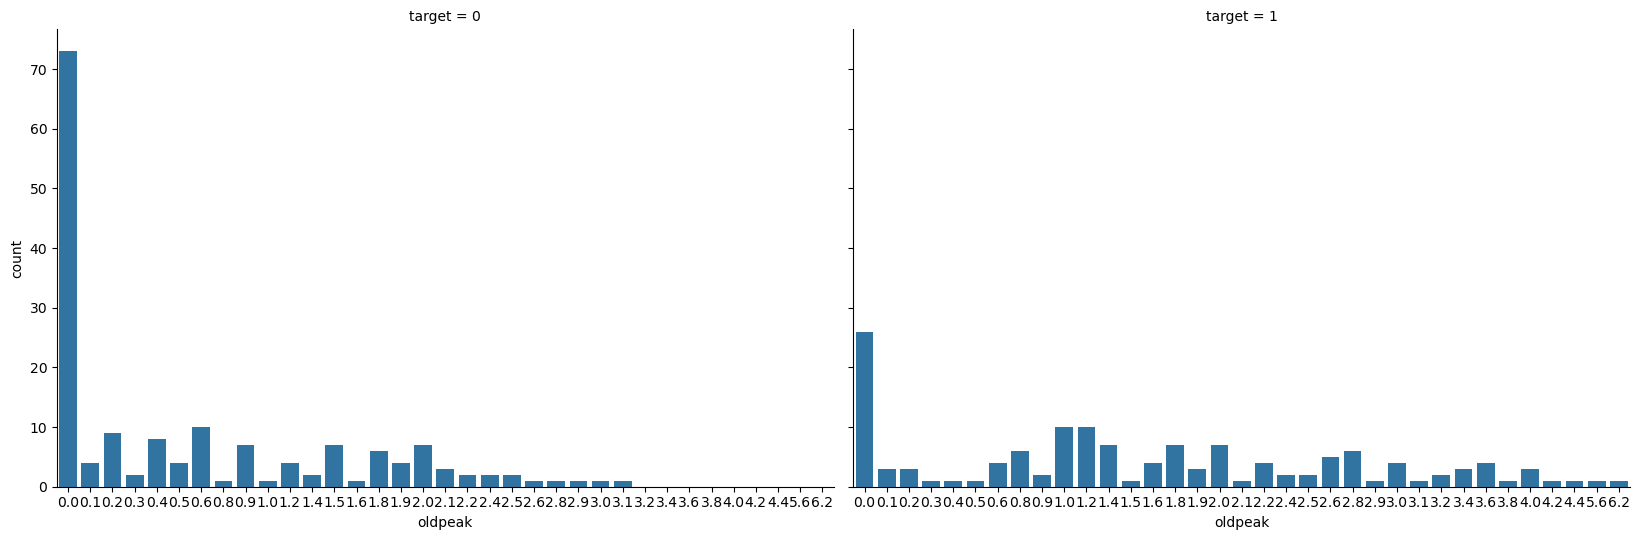

In [30]:
#oldpeak
#'slope', 'ca', 'thal'
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'oldpeak')

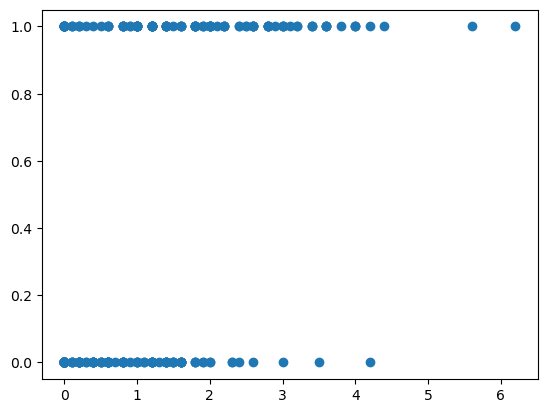

In [31]:
#revenu du conjoint
plt.scatter(df['oldpeak'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


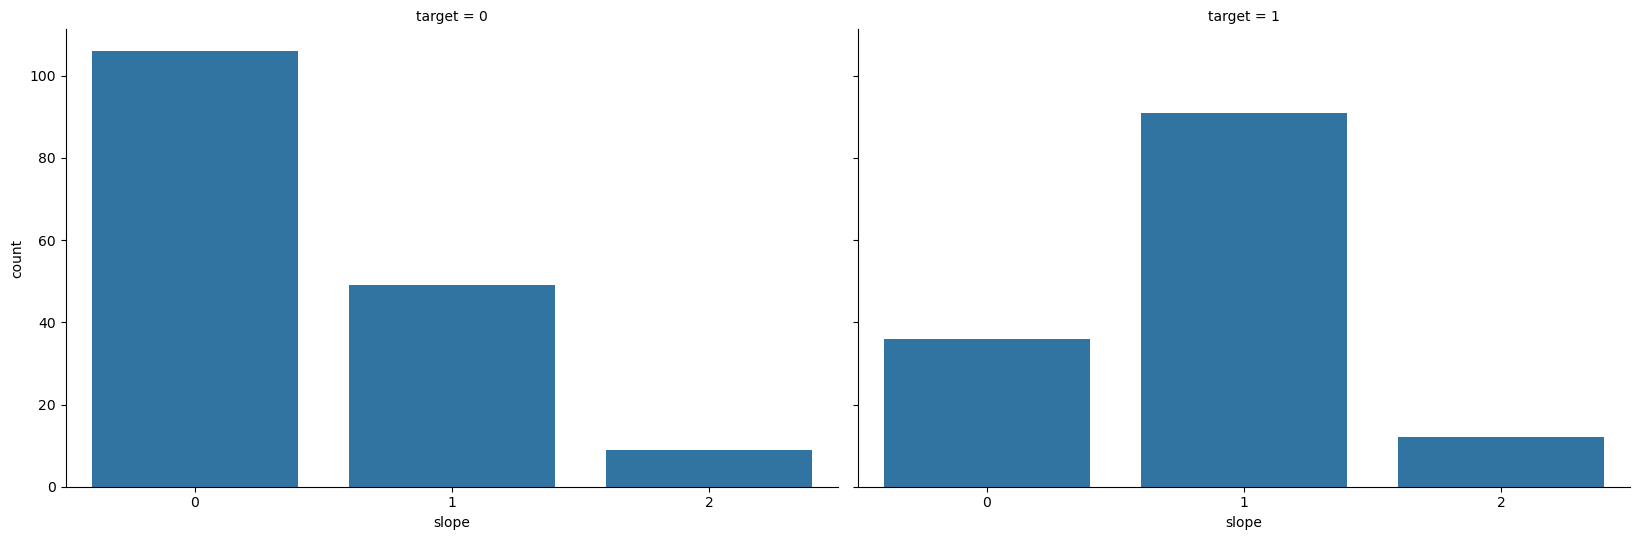

In [32]:
#slope
#'ca', 'thal'
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'slope')

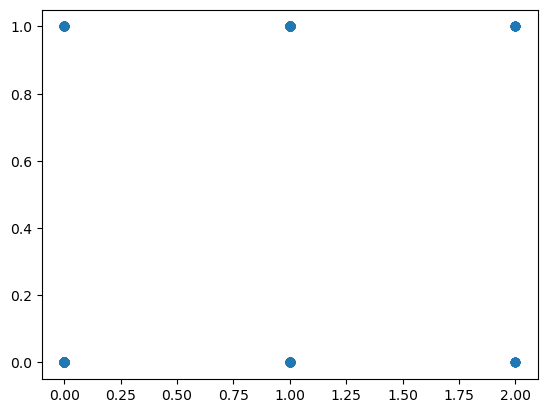

In [33]:
#revenu du conjoint
plt.scatter(df['slope'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


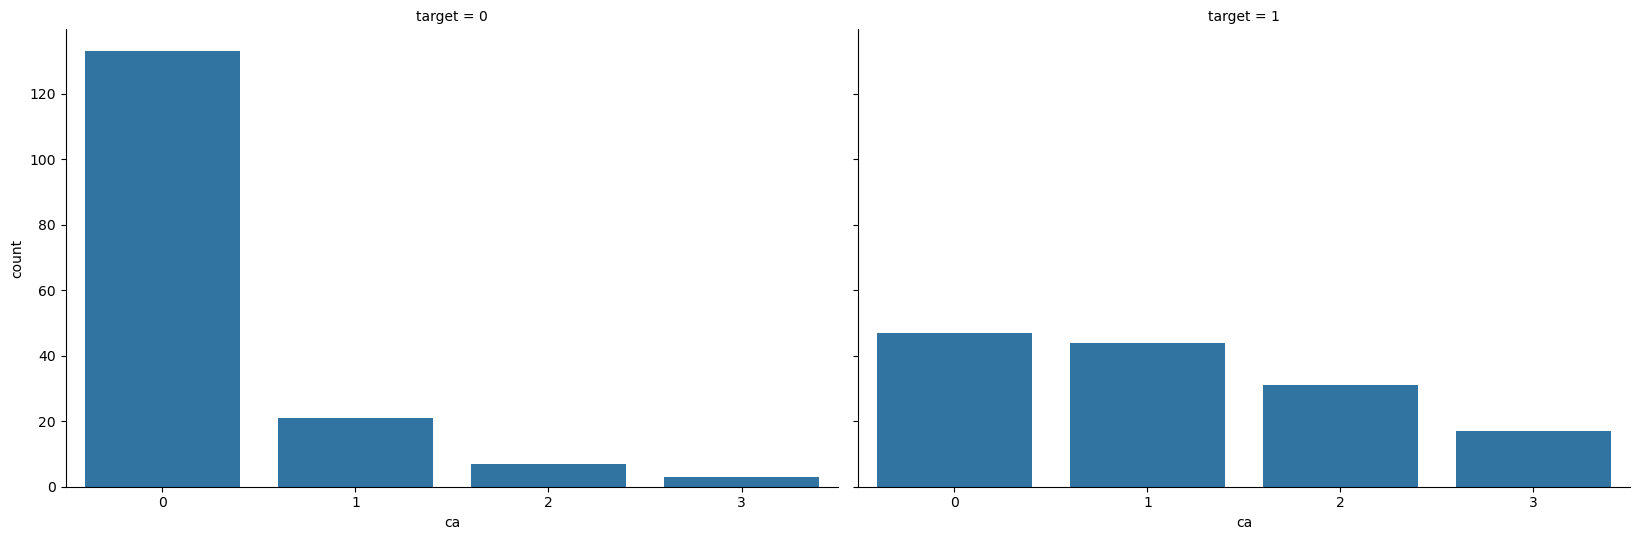

In [34]:
#ca
#'thal'
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'ca')

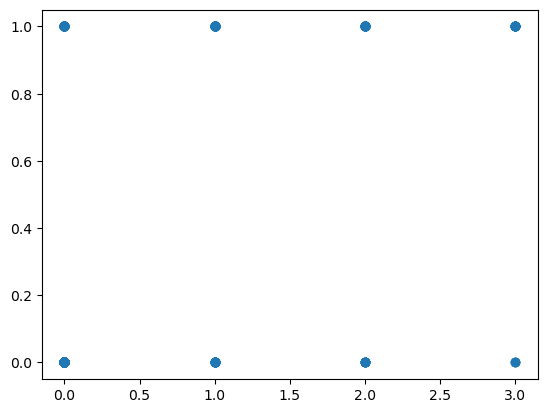

In [35]:
#revenu du conjoint
plt.scatter(df['ca'], df['target'])

C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\rivaldo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


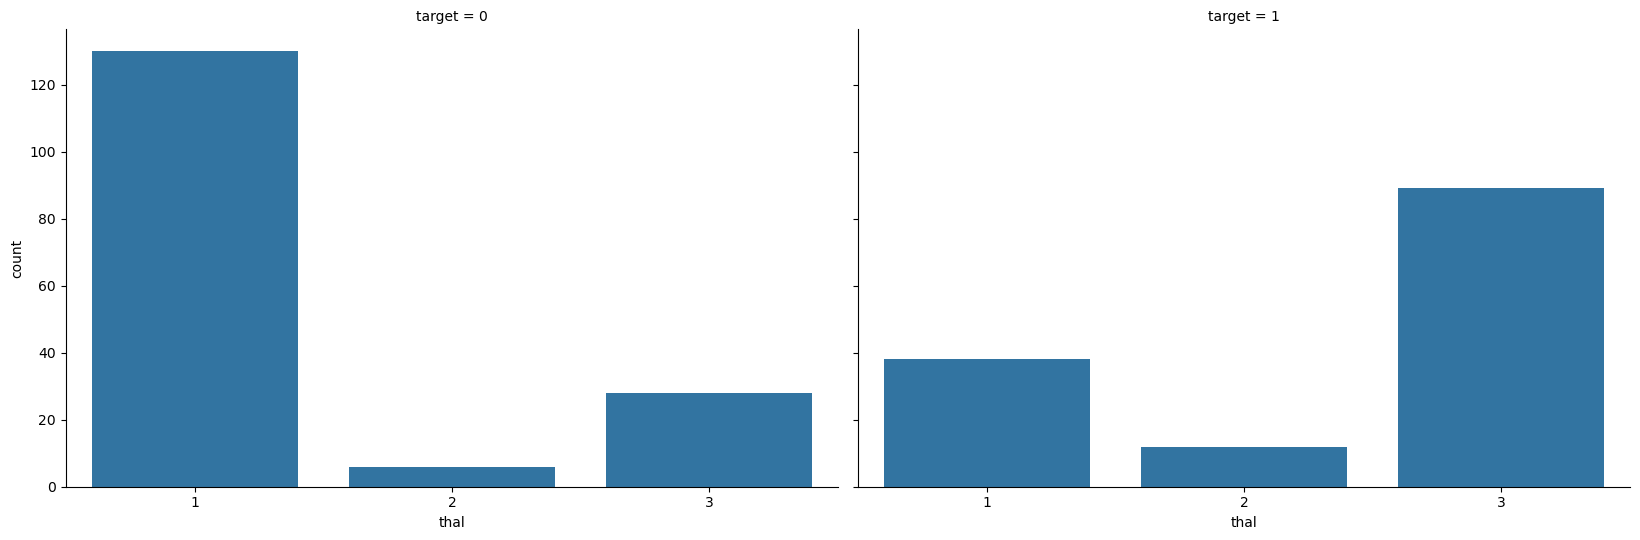

In [36]:
#thal
grid = sns.FacetGrid(df, col='target', height=5.5, aspect=1.5)
grid.map(sns.countplot, 'thal')

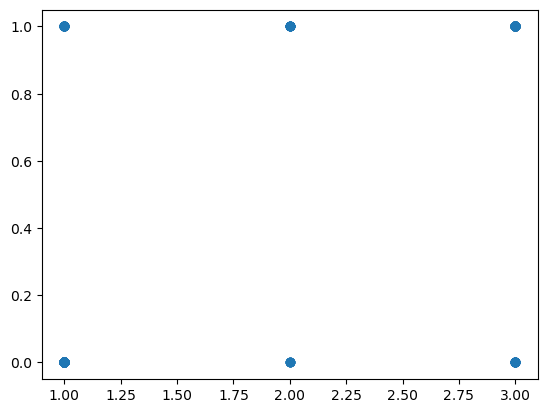

In [37]:
#revenu du conjoint
plt.scatter(df['thal'], df['target'])

diviser l'ensemble de données en un ensemble d'entraînement et un ensemble de test en utilisant train_test_split Supposons que nous avons décidé de diviser l'ensemble de données en 70% de données d'entraînement et 30% de données de test.

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [39]:
print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('y_train taille: ', y_train.shape)
print('y_test taille: ', y_test.shape)

X_train taille:  (212, 13)
X_test taille:  (91, 13)
y_train taille:  (212,)
y_test taille:  (91,)


In [40]:
#On va appliquer trois algorithmes: Logistic Regression, KNN, Decision Tree
models = {
     'LogisticRegression':LogisticRegression(random_state=42),
     'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=5),
     'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
 }

#definir la fonction de precision
def accu(y_true,y_pred,retu=False):
    accu = accuracy_score(y_true,y_pred)
    if retu:
        return accu
    else:
        print(f"la precision du model est: {accu}")

#fonction d'application des models
def train_test_eval(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(X_train,y_train)
        accu(y_test,model.predict(X_test))
        print('-'*30)

train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du model est: 0.8791208791208791
------------------------------
KNeighborsClassifier :
la precision du model est: 0.6813186813186813
------------------------------
DecisionTreeClassifier :
la precision du model est: 0.7032967032967034
------------------------------


C:\Users\rivaldo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
X_2 = X[['sex', 'cp','fbs','restecg','exang','oldpeak','ca','thal']]

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_2, Y, test_size = 0.3, random_state = 42)
print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('y_train taille: ', y_train.shape)
print('y_test taille: ', y_test.shape)

X_train taille:  (212, 8)
X_test taille:  (91, 8)
y_train taille:  (212,)
y_test taille:  (91,)


In [43]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du model est: 0.8571428571428571
------------------------------
KNeighborsClassifier :
la precision du model est: 0.8681318681318682
------------------------------
DecisionTreeClassifier :
la precision du model est: 0.7032967032967034
------------------------------


In [44]:
# Appliquer le KNN sur notre base de donnees
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_2,Y)

KNeighborsClassifier()

In [45]:
#Enregistrer le model
#pickle.dump(classifier,open('model.pkl','wb'))